# DecisionTree (FraudCheck)

Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Fraud_check.csv')

In [3]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
data.shape

(600, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
data.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [9]:
data['Undergrad'] = label_encoder.fit_transform(data['Undergrad'])
data['Marital.Status'] = label_encoder.fit_transform(data['Marital.Status'])
data['Urban'] = label_encoder.fit_transform(data['Urban'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int32
 1   Marital.Status   600 non-null    int32
 2   Taxable.Income   600 non-null    int64
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int32
dtypes: int32(3), int64(3)
memory usage: 21.2 KB


In [11]:
data.rename(columns = {'Marital.Status' : 'marital_status', 'Taxable.Income': 'tax_in', 'City.Population': 'city_popu',
                    'Work.Experience': 'work_exp'}, inplace= True)

In [12]:
data['status'] = data['tax_in'].apply(lambda tax_in: 'Risky' if tax_in <= 30000 else 'Good')

In [13]:
data.head()

,Undergrad,marital_status,tax_in,city_popu,work_exp,Urban,status
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good


In [14]:
data.drop(['tax_in'], axis=1, inplace=True)

In [15]:
data['status'] = label_encoder.fit_transform(data['status'])

In [16]:
x = data.iloc[:,0:5]
y = data['status']

In [17]:
x

,Undergrad,marital_status,city_popu,work_exp,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [18]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: status, Length: 600, dtype: int32

In [19]:
y.value_counts()

0    476
1    124
Name: status, dtype: int64


# Good is 0, Risky is 1

In [20]:
#Splitting data into training and test data set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=40)

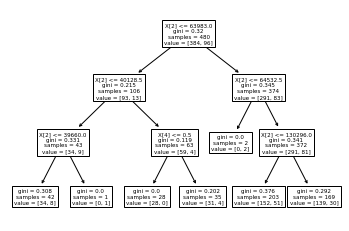

In [21]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini', max_depth=3)
model.fit(x_train, y_train)

#Plot the Decision tree
tree.plot_tree(model);

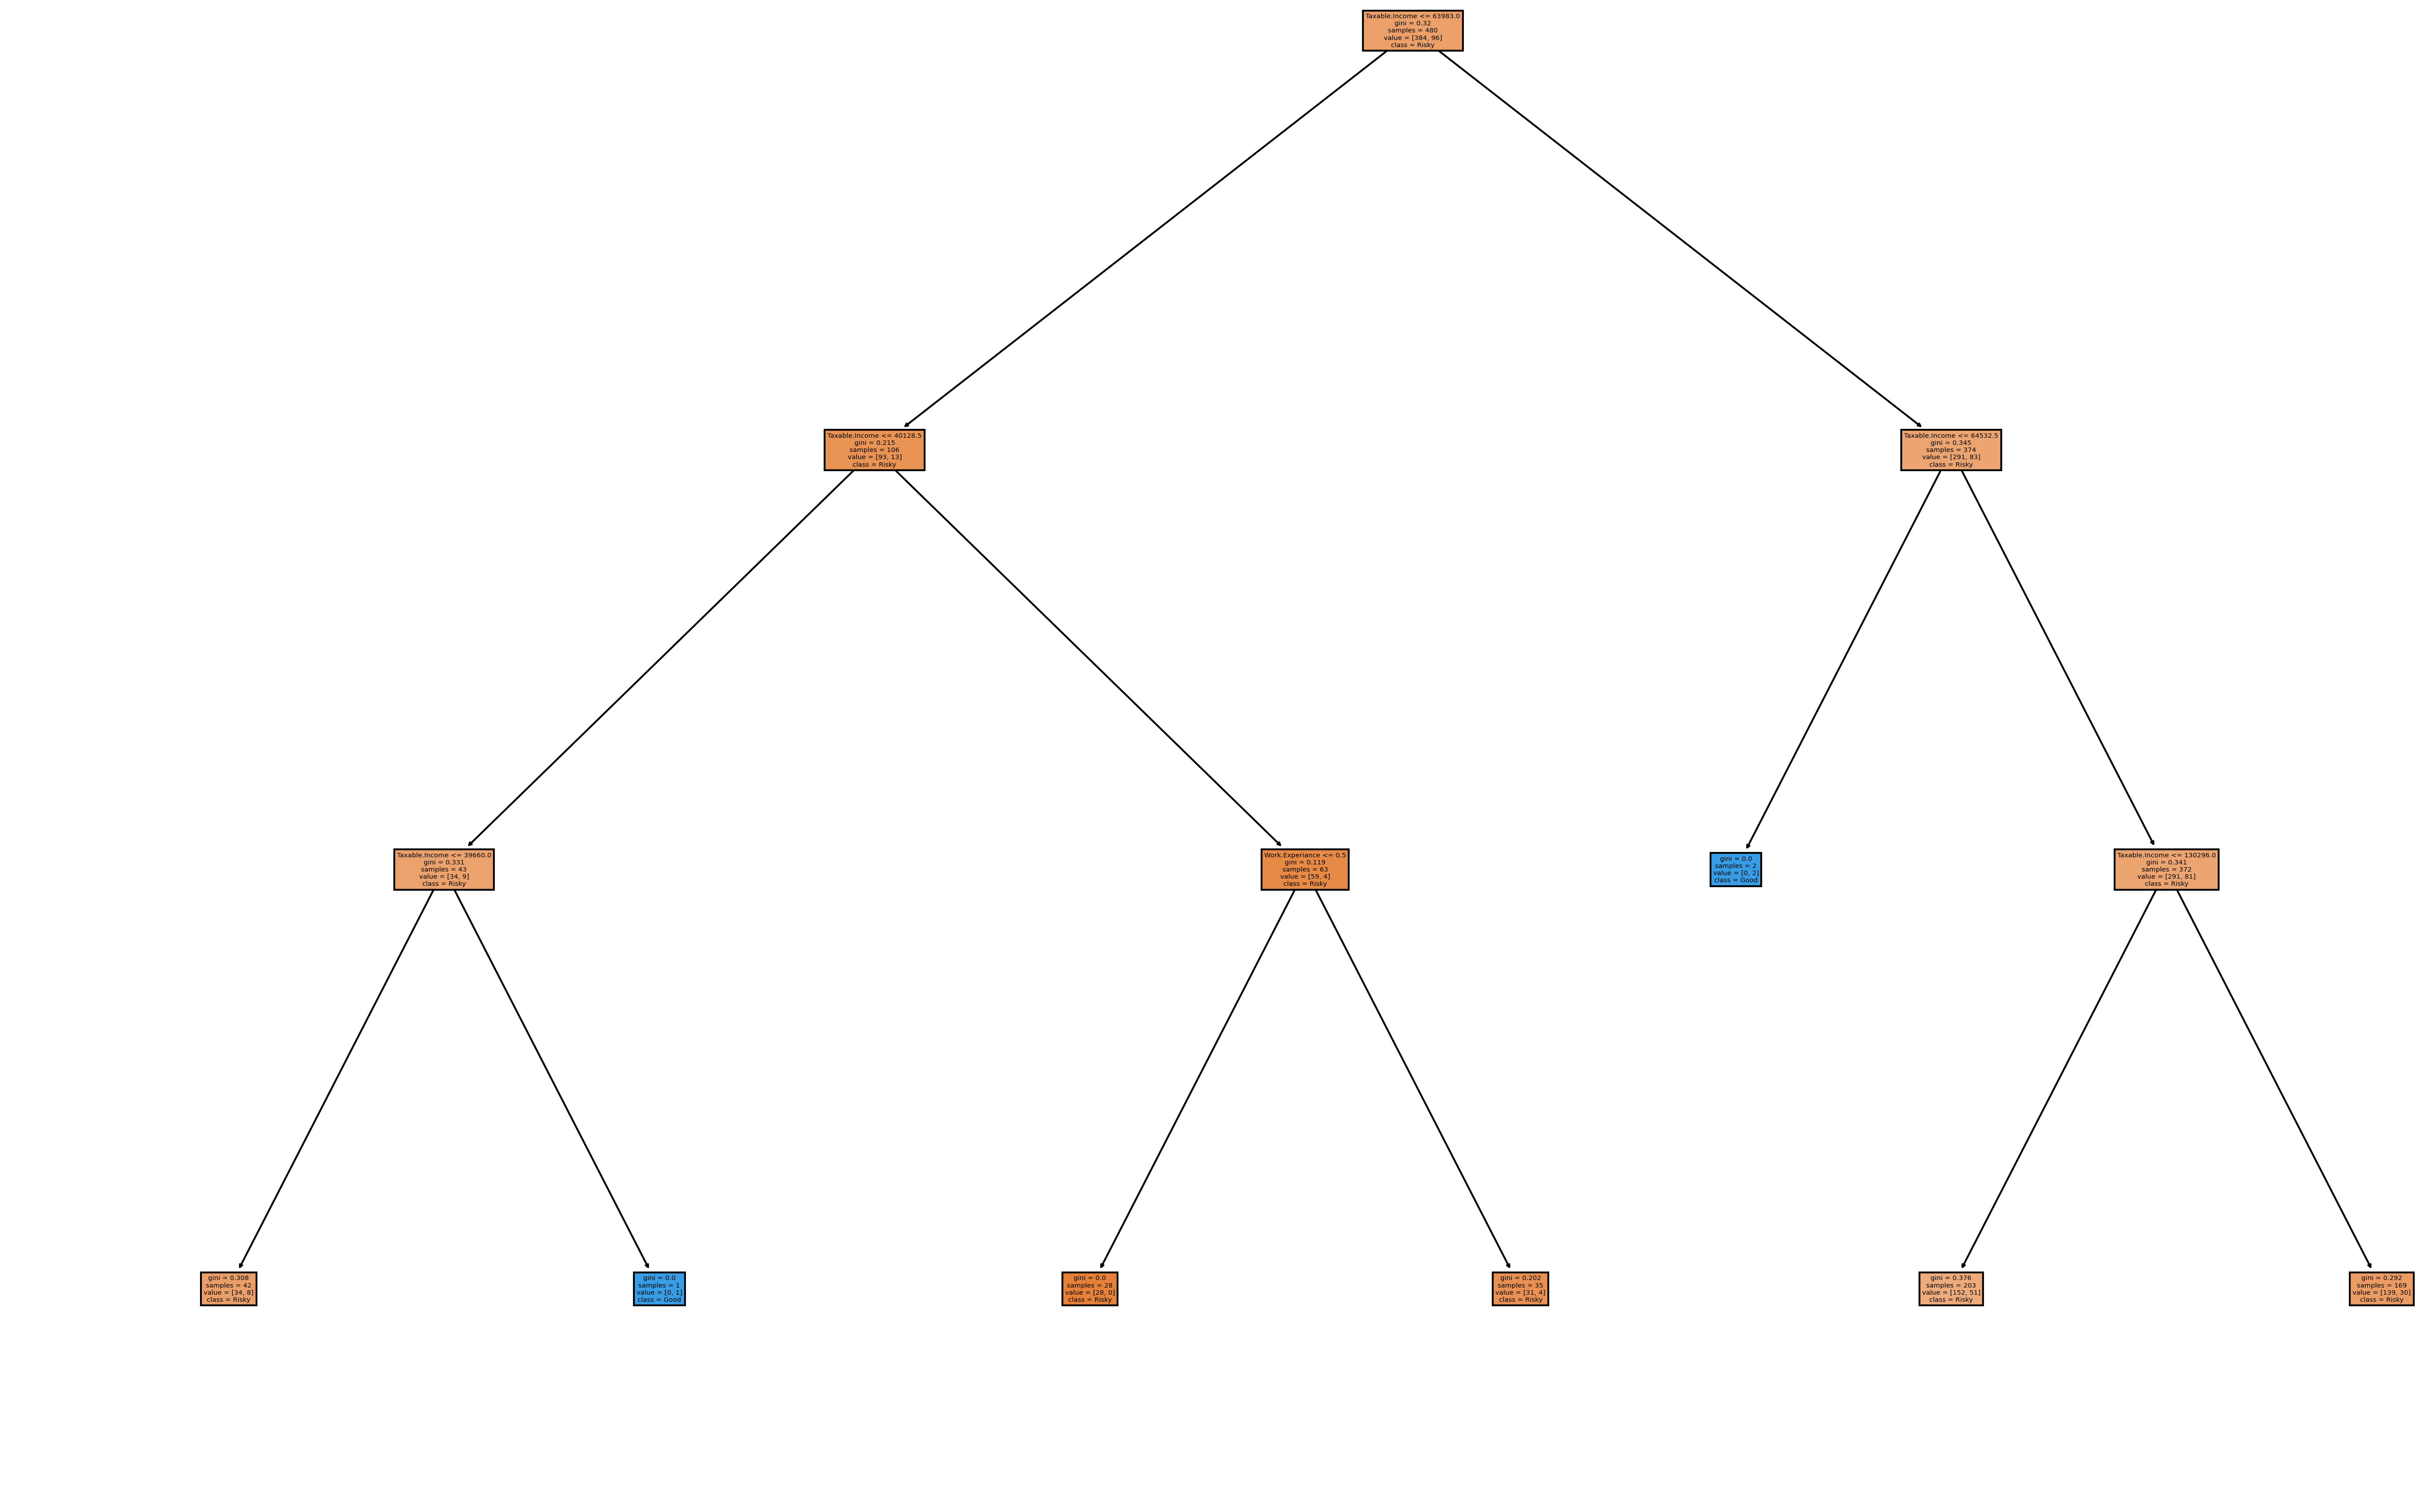

In [22]:
fn = ['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population', 'Work.Experiance', 'Urban']
cn = ['Risky', 'Good']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize= (6,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names = cn,
               filled = True);

In [23]:
#Predicting on test data
preds = model.predict(x_test)
pd.Series(preds).value_counts()

0    119
1      1
dtype: int64

In [24]:
x_test

,Undergrad,marital_status,city_popu,work_exp,Urban
159,1,2,28504,1,0
307,0,0,31819,25,0
253,1,2,77256,29,0
528,0,1,172612,10,0
137,1,2,115884,6,0
...,...,...,...,...,...
102,1,0,91488,23,0
577,1,1,52940,5,1
18,1,0,59269,6,0
560,0,0,182562,24,0


In [25]:
np.mean(preds==y_test)

0.7583333333333333

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.76      0.99      0.86        92
           1       0.00      0.00      0.00        28

    accuracy                           0.76       120
   macro avg       0.38      0.49      0.43       120
weighted avg       0.59      0.76      0.66       120

